In [1]:
import os
from utils.generaluse import scale_all_data
from models.attention import Attention_unet
from models.unet import Unet
from models.unet3plus import Unet_3plus
from models.bridgenet import FlexibleBridgeNet
from models.efficientNetB1 import EfficientNetB1
from utils.datapreparation import *
import matplotlib.pyplot as plt
import lwbna_unet as lwba


from network.CFPNetM import CFPNetM
from network.ENet import ENet
from network.ESPNet import ESPNet
from network.ICNet import ICNet

2025-04-04 13:01:49.893299: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-04 13:01:49.915046: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-04 13:01:49.915066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-04 13:01:49.916032: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-04 13:01:49.920233: I tensorflow/core/platform/cpu_feature_guar

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:

#folder = "Models_LRP_Parihaka"
#folder = "Models_LRP_Penobscot"
#folder="Models_RPRV_192x192_Parihaka"
#folder="Models_RPRV_192x192_Penobscot"
#folder="Models_RPEDS_Parihaka"
#folder="Models_RPEDS_Penobscot"
#folder="Models_EDS_Parihaka"
folder="Models_EDS_Penobscot"


In [4]:
slice_shape1=992
slice_shape2=192
stride1=128
stride2=64
stridetest1=128
stridetest2=64
num_extra_train=45
filters=[]
for i in range(0,6):
    filters.append(2**(4+i))
kernel=11
dropout=0
sizetrainx=192
sizetrainy=192

In [5]:
#PARIHAKA
#num_classes=6
#LRP
#train_image,train_label, test_image, test_label, val_image, val_label=LRP_Parihaka(shape=(slice_shape1,slice_shape2), stridetrain=(stride1,stride2), strideval=(stride1,stride2), stridetest=(stridetest1,stridetest2))
#RPRV
#train_image,train_label, test_image, test_label, val_image, val_label=RPRV_Parihaka(shape=(slice_shape1,slice_shape2), stridetrain=(stride1,stride2), strideval=(stride1,stride2), stridetest=(stridetest1,stridetest2), sizetrain_x=sizetrainx, sizetrain_y=sizetrainy, test_pos="end")
#RPEDS
#train_image,train_label, test_image, test_label, val_image, val_label=RPEDS_Parihaka(shape=(slice_shape1,slice_shape2), stridetrain=(stride1,stride2), strideval=(stride1,stride2), stridetest=(stridetest1,stridetest2), sizetrain_x=sizetrainx, sizetrain_y=sizetrainy, num_extra_train=num_extra_train)
#EDS
#train_image,train_label, test_image, test_label, val_image, val_label=EDS_Parihaka(shape=(slice_shape1,slice_shape2), stridetrain=(stride1,stride2), strideval=(stride1,stride2), stridetest=(stridetest1,stridetest2), num_train=num_extra_train)

In [6]:
#PENOBSCOT
num_classes=8
#LRP
#train_image,train_label, test_image, test_label, val_image, val_label=LRP_Penobscot(shape=(slice_shape1,slice_shape2), stridetrain=(stride1,stride2), strideval=(stride1,stride2), stridetest=(stridetest1,stridetest2))
#RPRV
#train_image,train_label, test_image, test_label, val_image, val_label=RPRV_Penobscot(shape=(slice_shape1,slice_shape2), stridetrain=(stride1,stride2), strideval=(stride1,stride2), stridetest=(stridetest1,stridetest2), sizetrain_x=sizetrainx, sizetrain_y=sizetrainy, test_pos="end")
#RPEDS
#train_image,train_label, test_image, test_label, val_image, val_label=RPEDS_Penobscot(shape=(slice_shape1,slice_shape2), stridetrain=(stride1,stride2), strideval=(stride1,stride2), stridetest=(stridetest1,stridetest2), sizetrain_x=sizetrainx, sizetrain_y=sizetrainy, num_extra_train=num_extra_train)
#EDS
train_image,train_label, test_image, test_label, val_image, val_label=EDS_Penobscot(shape=(slice_shape1,slice_shape2), stridetrain=(stride1,stride2), strideval=(stride1,stride2), stridetest=(stridetest1,stridetest2), num_train=num_extra_train)


In [7]:
def load_model(model_id):
    if(model_id== 0):
        model = Unet(tam_entrada=(slice_shape1, slice_shape2, 1), num_filtros=filters, classes=num_classes,kernel_size=kernel,dropout_rate=dropout)
        name="UNet"
    elif(model_id== 1):
        model = Unet_3plus(tam_entrada=(slice_shape1, slice_shape2, 1), n_filters=filters[:-1], classes=num_classes,kernel_size=kernel,dropout_rate=dropout)
        name="UNet3+"
    elif(model_id== 2):
        model = Attention_unet(tam_entrada=(slice_shape1, slice_shape2, 1), num_filtros=filters, classes=num_classes,kernel_size=kernel,dropout_rate=dropout)
        name="Attention"
    elif(model_id== 3):
        model = FlexibleBridgeNet(input_size=(slice_shape1,slice_shape2,1),up_down_times=5, Y_channels=num_classes, kernel_size=kernel,
                                kernels_all=[16, 32, 64, 128, 256, 512][0:6], conv2act_repeat=2, res_case=0,
                                res_number=0)
        name="BridgeNet"
    elif(model_id== 4):
        model = CFPNetM(slice_shape1, slice_shape2, 1, num_classes)
        name="CFPNetM"

    elif(model_id== 5):
        model = ENet(slice_shape1, slice_shape2, 1, num_classes)
        name="ENet"
    elif(model_id== 6):
        model = ESPNet(slice_shape1, slice_shape2, 1, num_classes)
        name="ESPNet"
    elif(model_id== 7):
        model = ICNet(slice_shape1, slice_shape2, 1, num_classes)
        name="ICNet"
    elif(model_id== 8):
        model = EfficientNetB1(slice_shape1,slice_shape2, 1, num_classes)
        name="EfficientNetB1"
        
    elif(model_id== 9):
        model = lwba.LWBNAUnet(
                n_classes=num_classes, 
                filters=64, 
                depth=4, 
                midblock_steps=4, 
                dropout_rate=0.3, 
                name="lwbna_unet"
            )
        model.build(input_shape=(16,slice_shape1, slice_shape2,1))
        name="LWBNA"
    return model,name

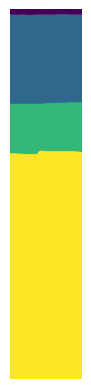

In [8]:
image=test_image[100]
label=test_label[100]
plt.imshow(label)
plt.axis('off')
plt.show()

In [9]:
def calculate_accuracy(pred_mask, label_mask):
    return np.mean(pred_mask == label_mask)
def calculate_iou(pred_mask, true_mask, num_classes=6):
    ious = []
    for cls in range(num_classes):
        pred_inds = (pred_mask == cls)
        label_inds = (true_mask == cls)

        intersection = np.logical_and(pred_inds, label_inds).sum()
        union = np.logical_or(pred_inds, label_inds).sum()

        if union == 0:
            ious.append(np.nan)  # Ignore classes not present
        else:
            ious.append(intersection / union)
    
    # Mean IoU over present classes
    return np.nanmean(ious)


In [12]:
from tensorflow.keras import backend as K
import gc
predictions=[]
names=[]
accuracies=[]
ious = []
for i in range(0,10):
    model,name=load_model(i)
    checkpoint_filepath = '/scratch/nunes/base_checkpoints/'+ folder + '/checkpoint_' + name + '.weights.h5'
    print(checkpoint_filepath)
    model.load_weights(checkpoint_filepath)
    if i == 9:
        lw_image, lw_label = scale_all_data((image, label))
        lw_image = lw_image.squeeze()
        pred = model.predict(lw_image[np.newaxis, ..., np.newaxis])
        pred_mask = np.argmax(pred[0], axis=-1)
        acc = calculate_accuracy(pred_mask, label)
        iou = calculate_iou(pred_mask, label)
    else:
        pred = model.predict(image[np.newaxis, ..., np.newaxis])
        pred_mask = np.argmax(pred[0], axis=-1)
        acc = calculate_accuracy(pred_mask, label)
        iou = calculate_iou(pred_mask, label)

    predictions.append(pred_mask.squeeze())
    names.append(name)
    accuracies.append(acc)
    ious.append(iou)

    del model
    K.clear_session()
    gc.collect()

/scratch/nunes/base_checkpoints/Models_EDS_Penobscot/checkpoint_UNet.weights.h5
1/1 [==============================] - 0s 151ms/step
Automated hyper-parameter determination is applied with the following details:
----------
	Number of convolution filters after each full-scale skip connection: filter_num_skip = [16, 16, 16, 16]
	Number of channels of full-scale aggregated feature maps: filter_num_aggregate = 80
----------
deep_supervision = True
names of output tensors are listed as follows ("sup0" is the shallowest supervision layer;
"final" is the final output layer):

	unet3plus_output_sup0_activation
	unet3plus_output_sup1_activation
	unet3plus_output_sup2_activation
	unet3plus_output_sup3_activation
	unet3plus_output_final_activation
/scratch/nunes/base_checkpoints/Models_EDS_Penobscot/checkpoint_UNet3+.weights.h5
1/1 [==============================] - 0s 299ms/step
/scratch/nunes/base_checkpoints/Models_EDS_Penobscot/checkpoint_Attention.weights.h5
1/1 [============================

2025-04-04 13:05:08.379199: I tensorflow/core/grappler/optimizers/generic_layout_optimizer.cc:403] Cancel Transpose nodes around Pad: transpose_before=ENET/permute_1_1.0/transpose pad=ENET/zeropadding_1.0/Pad transpose_after=ENET/permute_2_1.0/transpose
2025-04-04 13:05:08.379236: I tensorflow/core/grappler/optimizers/generic_layout_optimizer.cc:403] Cancel Transpose nodes around Pad: transpose_before=ENET/permute_1_2.0/transpose pad=ENET/zeropadding_2.0/Pad transpose_after=ENET/permute_2_2.0/transpose


/scratch/nunes/base_checkpoints/Models_EDS_Penobscot/checkpoint_ESPNet.weights.h5
1/1 [==============================] - 1s 512ms/step
/scratch/nunes/base_checkpoints/Models_EDS_Penobscot/checkpoint_ICNet.weights.h5
1/1 [==============================] - 0s 433ms/step
/scratch/nunes/base_checkpoints/Models_EDS_Penobscot/checkpoint_EfficientNetB1.weights.h5
1/1 [==============================] - 1s 719ms/step
/scratch/nunes/base_checkpoints/Models_EDS_Penobscot/checkpoint_LWBNA.weights.h5
1/1 [==============================] - 1s 531ms/step


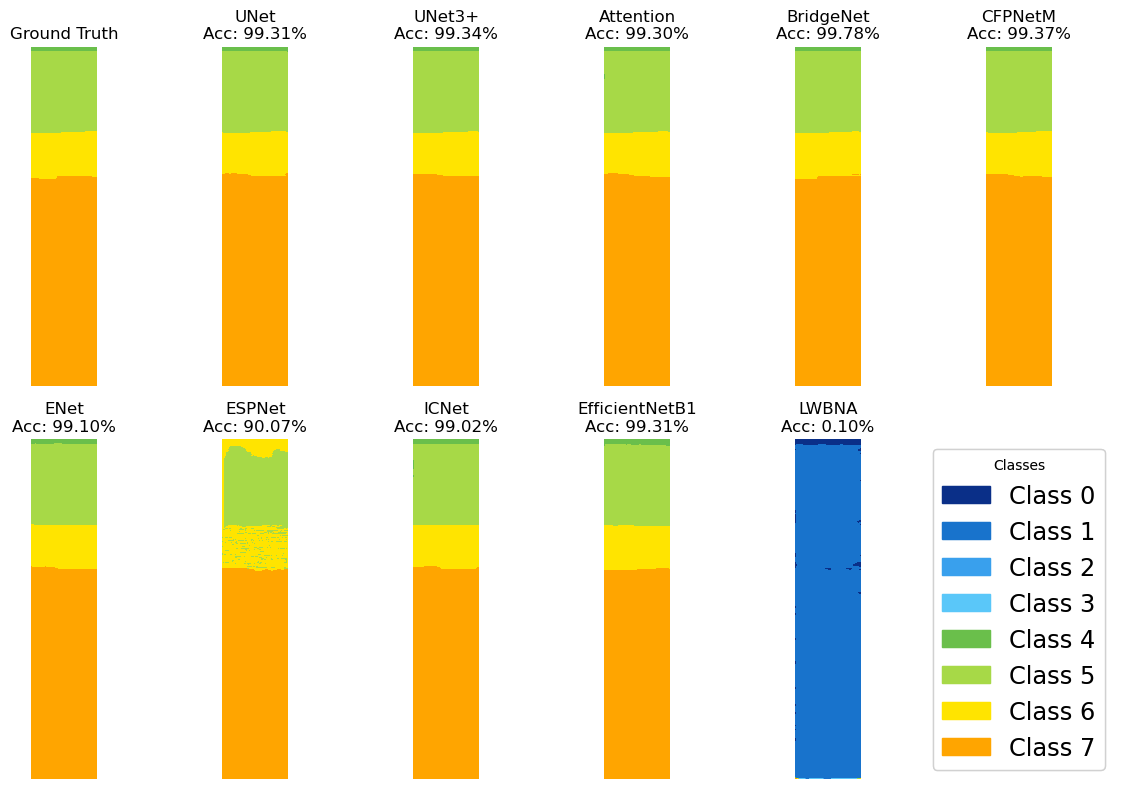

: 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Custom color map
custom_colors = {
    0: "#0A2F88",  # Dark Blue
    1: "#1873CC",  # Medium Blue
    2: "#39A0ED",  # Light Blue
    3: "#5AC7F9",  # Cyan
    4: "#6ABF4B",  # Green
    5: "#A7D947",  # Yellow-Green
    6: "#FFE400",  # Yellow
    7: "#FFA500",  # Orange
}

used_colors = [custom_colors[i] for i in range(num_classes)]

# Create a ListedColormap for only the used classes
from matplotlib.colors import ListedColormap
cmap = ListedColormap(used_colors)

# Update labels and patches accordingly
class_labels = [f'Class {i}' for i in range(num_classes)]
patches = [mpatches.Patch(color=used_colors[i], label=class_labels[i]) for i in range(num_classes)]

# Create figure and axes
fig, axes = plt.subplots(2, 6, figsize=(12, 8))
axes = axes.flatten()

# Ground truth
axes[0].imshow(label, cmap=cmap, vmin=0, vmax=num_classes - 1)
axes[0].set_title("Ground Truth")
axes[0].axis('off')

# Predictions with metrics
for idx, (pred_mask, name, acc, iou) in enumerate(zip(predictions, names, accuracies, ious)):
    axes[idx + 1].imshow(pred_mask, cmap=cmap, vmin=0, vmax=num_classes - 1)
    axes[idx + 1].set_title(f"{name}\nAcc: {acc:.2%}")  # \nIoU: {iou:.2f}
    axes[idx + 1].axis('off')

# Shared legend in the last subplot
axes[-1].axis('off')
legend = axes[-1].legend(handles=patches, loc='center', fontsize='xx-large', title="Classes")
axes[-1].add_artist(legend)

plt.tight_layout()
plt.show()
